# Data preprocessing and EDA 

<i>Author: Jamell Dacon</i>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import math
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

### Load in the data

In [2]:
df = pd.read_csv("data/labeled_comments.csv")
df.head()

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,would it turn you on if i said that all gays are mentally ill ? do you like being called retarted? hey retard hey stupid . you horny yet psycho,0.994916,0.213795,0.882000,0.014427,0.953307,0.777191
1,yeah except gay people are mentally ill,0.948516,0.042020,0.230926,0.010428,0.446489,0.711359
2,gay people are mentally ill,0.977366,0.084198,0.270643,0.017314,0.673814,0.830843
3,wow gay people truly are mentally ill after all that sounds like gay people are mentally ill to me,0.963016,0.061345,0.274645,0.014592,0.597969,0.755068
4,thats like saying gay people are mentally ill none binary people excist it doesnt effects you why do you care,0.924768,0.026541,0.132567,0.008059,0.333981,0.629133


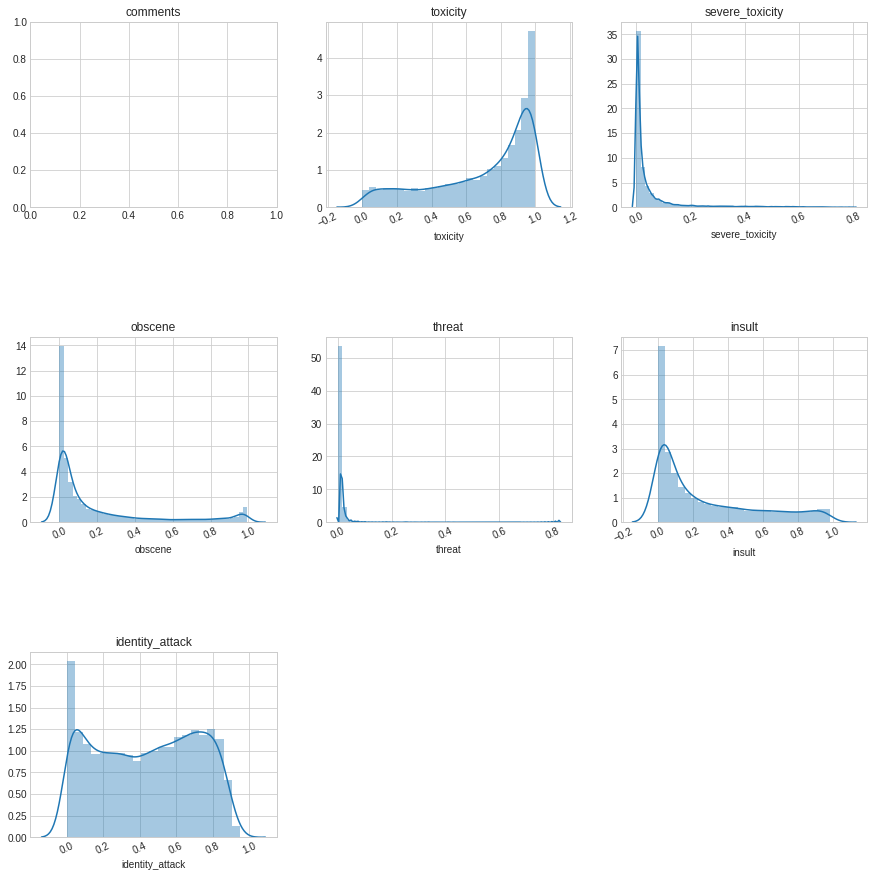

In [3]:
# Let’s plot the distribution of each feature

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] != np.object:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=15, height=15, hspace=0.7, wspace=0.2)

In [4]:
#df.to_csv('labeled_comments', index=False)

In [5]:
t = df.drop(['comments'], axis=1)
t.head()

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,0.994916,0.213795,0.882000,0.014427,0.953307,0.777191
1,0.948516,0.042020,0.230926,0.010428,0.446489,0.711359
2,0.977366,0.084198,0.270643,0.017314,0.673814,0.830843
3,0.963016,0.061345,0.274645,0.014592,0.597969,0.755068
4,0.924768,0.026541,0.132567,0.008059,0.333981,0.629133


(6.0, 0.0)

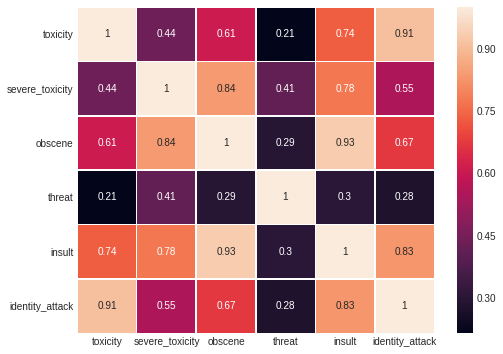

In [6]:
# We can create a correlation matrix to grasp the correlation between features of the bank_additional_full_df 
# with the exception of the target variable (y)

f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(t.corr(), annot=True, linewidths=.5,ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [7]:
# Applying the condition

df.loc[df["toxicity"] >= 0.5, "toxicity"] = int(1)
df.loc[df["severe_toxicity"] >= 0.5, "severe_toxicity"] = int(1)
df.loc[df["obscene"] >= 0.5, "obscene"] = int(1)
df.loc[df["threat"] >= 0.5, "threat"] = int(1)
df.loc[df["insult"] >= 0.5, "insult"] = int(1)
df.loc[df["identity_attack"] >= 0.5, "identity_attack"] = int(1)

df.loc[df["toxicity"] < 0.5, "toxicity"] = int(0)
df.loc[df["severe_toxicity"] < 0.5, "severe_toxicity"] = int(0)
df.loc[df["obscene"] < 0.5, "obscene"] = int(0)
df.loc[df["threat"] < 0.5, "threat"] = int(0)
df.loc[df["insult"] < 0.5, "insult"] = int(0)
df.loc[df["identity_attack"] < 0.5, "identity_attack"] = int(0)

In [8]:
df.head()

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,would it turn you on if i said that all gays are mentally ill ? do you like being called retarted? hey retard hey stupid . you horny yet psycho,1.0,0.0,1.0,0.0,1.0,1.0
1,yeah except gay people are mentally ill,1.0,0.0,0.0,0.0,0.0,1.0
2,gay people are mentally ill,1.0,0.0,0.0,0.0,1.0,1.0
3,wow gay people truly are mentally ill after all that sounds like gay people are mentally ill to me,1.0,0.0,0.0,0.0,1.0,1.0
4,thats like saying gay people are mentally ill none binary people excist it doesnt effects you why do you care,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
df['toxicity'].value_counts()

1.0    7459
0.0    2471
Name: toxicity, dtype: int64

In [10]:
df['severe_toxicity'].value_counts()

0.0    9745
1.0    185 
Name: severe_toxicity, dtype: int64

In [11]:
df['obscene'].value_counts()

0.0    8340
1.0    1590
Name: obscene, dtype: int64

In [12]:
df['threat'].value_counts()

0.0    9902
1.0    28  
Name: threat, dtype: int64

In [13]:
df['insult'].value_counts()

0.0    7686
1.0    2244
Name: insult, dtype: int64

In [14]:
df['identity_attack'].value_counts()

0.0    5436
1.0    4494
Name: identity_attack, dtype: int64

In [15]:
#df.to_csv('binary_labeled_comments.csv')

Data Comment Breakdown

7459 toxicity comments. (75.12% of all data.)
- 185 or 2.48% were also severe_toxicity.
- 1590 or 21.32% were also obscene.
- 28 or 0.38% were also threat.
- 2244 or 30.08% were also insult.
- 4494 or 60.25% were also identity_attack.

185 severe_toxicity comments. (1.86% of all data.)
- 185 or 100.00% were also toxicity.
- 185 or 100.00% were also obscene.
- 13 or 7.03% were also threat.
- 185 or 100.00% were also insult.
- 184 or 99.46% were also identity_attack.

1590 obscene comments. (16.01% of all data.)
- 1590 or 100.00% were also toxicity.
- 185 or 11.64% were also severe_toxicity.
- 23 or 1.45% were also threat.
- 1512 or 95.09% were also insult.
- 1443 or 90.75% were also identity_attack.

28 threat comments. (0.28% of all data.)
- 28 or 100.00% were also toxicity.
- 13 or 46.43% were also severe_toxicity.
- 23 or 82.14% were also obscene.
- 25 or 89.29% were also insult.
- 27 or 96.43% were also identity_attack.

2244 insult comments. (22.60% of all d

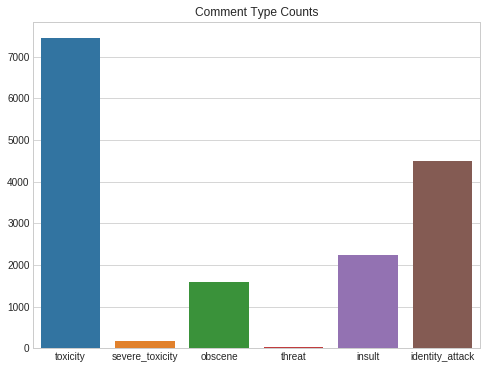

In [16]:
targets = list(df.columns[1:])
df_targets = df[targets].copy()

# How many rows are toxic? 
harmful_rows = df_targets.sum(axis=1)
harmful_rows = (harmful_rows > 0)

count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_targets[(df_targets[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts


del(df_selection)


print('Data Comment Breakdown')
totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s comments. (%.2f%% of all data.)' % (value[0][1], key, (value[0][1]/len(df))*100))
    for cnt in value[1:]:
        print('- %d or %.2f%% were also %s.' % (cnt[1], (cnt[1]/value[0][1])*100, cnt[0]))
    

plt.figure('Comment Type Counts', figsize=[8,6])
plt.title('Comment Type Counts')
sns.barplot(x=list(count_dic.keys()), y=totals)
plt.show()

## Toxicity

In [17]:
toxic_harm = df[df['toxicity'] == 1]
toxic_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
6822,ahh catholicism where being gay is a a worse sin than murder.,1.0,0.0,0.0,0.0,0.0,1.0
2479,orcs arnt real. humans and gays are. you need the thinking skills. he didnt lash out either you just did. weak minded fucks like you indeed.,1.0,0.0,1.0,0.0,1.0,1.0
1209,are you saying gays are as bad as pedophiles or saying gays are worse? either is just a shit opinion but still.,1.0,0.0,1.0,0.0,1.0,1.0
8209,so youd be fine with her being fired for a back the blue poster or saying being gay is sinful?,1.0,0.0,0.0,0.0,0.0,0.0
4126,recognizing reality isnt a lack of tolerance its just speaking the truth. transgenders are mentally ill its a fact. there is no way around it.,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
toxic_non_harm = df[df['toxicity'] == 0]
toxic_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
6408,being gay is not a sin though,0.0,0.0,0.0,0.0,0.0,0.0
9393,the fact that calling boogie an emotional lesbian is a popular joke on this sub really highlights the age and maturity of most of its users for me.,0.0,0.0,0.0,0.0,0.0,0.0
8610,gender dysphoria is a mental disorder. being transgender is not a mental disorder. does that clear it up?,0.0,0.0,0.0,0.0,0.0,0.0
8189,its because these people still believe being gay is some kind of choice. its so frustrating.,0.0,0.0,0.0,0.0,0.0,0.0
2814,it is a stereotype that bisexuals are always confused.,0.0,0.0,0.0,0.0,0.0,0.0


## Severe Toxicity

In [19]:
severe_harm = df[df['severe_toxicity'] == 1]
severe_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
855,you sound like a fucking mormon who thinks that gay people are bad and comparable to pedophiles.,1.0,1.0,1.0,0.0,1.0,1.0
2309,trans is fine gays are fine as long as they aint being a faggot to me like let me suck ur dick shit its fine,1.0,1.0,1.0,0.0,1.0,1.0
7081,so suck it up buttercup and ask them if being gay is a disease. fucking troll.,1.0,1.0,1.0,0.0,1.0,1.0
5301,those damn homosexuals are all child rapists! btw why cant i fuck the smart kids,1.0,1.0,1.0,0.0,1.0,1.0
6170,because fuck you if you believe being homosexual is a sin,1.0,1.0,1.0,0.0,1.0,1.0


In [20]:
severe_non_harm = df[df['severe_toxicity'] == 0]
severe_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
6366,you are totally right what i should have said is that he strikes me as the religious nut who believes being gay is a sin..,1.0,0.0,0.0,0.0,0.0,0.0
1082,thinking all gay people are pedophiles is pretty homophobic.,1.0,0.0,0.0,0.0,0.0,1.0
9233,lesbian is strange. am i rite?,0.0,0.0,0.0,0.0,0.0,0.0
355,haha they gays are winning. flips them off with my flamboyant boner,1.0,0.0,1.0,0.0,1.0,1.0
5470,gay is not a put down. it would be like using the words asexual or 2-legged as a put down. gay a state of being not a put down.,0.0,0.0,0.0,0.0,0.0,0.0


## Obscene

In [21]:
obscene_harm = df[df['obscene'] == 1]
obscene_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
5754,this really offends me as a solid-pound middle aged woman with red hair i dont like how gay is used in this it should be faggot,1.0,0.0,1.0,0.0,1.0,1.0
2359,whoever made that rule as a filter for videos is a fucking faggot and everything wrong the internet. so now gay people are wrong? dude.,1.0,1.0,1.0,0.0,1.0,1.0
8873,where the fuck do you live where being transgender is punishable by criminal execution due to christians in power?,1.0,1.0,1.0,0.0,1.0,1.0
1733,why does every guy who is homophic always think gay people are predators and just fuck everything they see lol,1.0,0.0,1.0,0.0,1.0,1.0
3251,bruh. not all gay people are respectable and you are the weird one for thinking you should respect an asshole whos gay.,1.0,0.0,1.0,0.0,1.0,1.0


In [22]:
obscene_non_harm = df[df['obscene'] == 0]
obscene_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
8972,the fact that being lesbian is sinful too she already sinning take it easy on her sin at a time,1.0,0.0,0.0,0.0,0.0,0.0
685,so in your mind gay people are pedophile ? and cant have children ? wow,1.0,0.0,0.0,0.0,0.0,1.0
9516,really sick of queer people are responsible for their own oppression being seen as a form of acceptable comedy.,1.0,0.0,0.0,0.0,0.0,0.0
5274,are you saying homosexuals are sexual predators?,1.0,0.0,0.0,0.0,0.0,0.0
6621,i was getting down and dirty with dudes as young as and i quit at because being gay is a sin. its taken me until mys until i can accept who i am,1.0,0.0,0.0,0.0,0.0,0.0


## Threat

In [23]:
threat_harm = df[df['threat'] == 1]
threat_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
2637,he will kill me because gays are antifa socialists. sin does transfer read the bible shit head.,1.0,0.0,1.0,1.0,1.0,1.0
7891,i dare you to say gay is an insult to someone gay you coward. ill enjoy when they knock the shit out of you.,1.0,1.0,1.0,1.0,1.0,1.0
2568,im gonna go beat the shit out of some women then scream about how gays are evil and an abomination! fuck this loser and his moron fans.,1.0,1.0,1.0,1.0,1.0,1.0
6641,if being gay is a sin.that means it would send you to hell.in hell.you burn for eternity,1.0,0.0,1.0,1.0,1.0,1.0
186,gay people are mentally ill and will burn in hell,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
threat_non_harm = df[df['threat'] == 0]
threat_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
3071,zoomer gays are a strange lot,1.0,0.0,0.0,0.0,0.0,1.0
8215,these guys being gay is a sinful choice! just ask me!! id bone girls and guys if i could!,1.0,0.0,1.0,0.0,1.0,1.0
1514,profound impact? the gays are being dramatic and reaching again. jesus christ,0.0,0.0,0.0,0.0,0.0,0.0
5011,i mean hes not a serial killer and he basically is gay is at least confused about it,1.0,0.0,0.0,0.0,0.0,0.0
9520,no. bye. i donut hate wheeler. queer people are nice. but you are mean to me. i am going to talk to my friends on my subreddit. you are bad trolls,1.0,0.0,0.0,0.0,1.0,1.0


## Insult

In [25]:
insult_harm = df[df['insult'] == 1]
insult_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
5766,so youre actually gay? is that why you were triggered you degenerate faggot?,1.0,0.0,1.0,0.0,1.0,1.0
9902,low-effort soapbox bullshit. we get it queer people are so strange and horrible to you. take it to any of the other garbage shitposting subs.,1.0,0.0,1.0,0.0,1.0,0.0
5643,ok faggot. listen here you little shit. gay is fun to say,1.0,0.0,1.0,0.0,1.0,1.0
740,gays are all pedophiles,1.0,0.0,0.0,0.0,1.0,1.0
2345,not all gays are faggots and not all faggots are gay. for example youre probably not gay but you are a faggot.,1.0,0.0,1.0,0.0,1.0,1.0


In [26]:
insult_non_harm = df[df['insult'] == 0]
insult_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
3363,just dont try to push off american cultural norms as normal. shoes off in house gays are weird etc. etc.,1.0,0.0,0.0,0.0,0.0,0.0
8660,transgender is a mental disorder. intersex is a birth defect.,1.0,0.0,0.0,0.0,0.0,0.0
8891,lmao what kind of terrible plot is that bisexual is not the opposite of asexual. speaking of amp b mods are allosexual,1.0,0.0,0.0,0.0,0.0,0.0
9865,queer people are so insufferable. it defines everything about them and thats how they want it to be.,1.0,0.0,0.0,0.0,0.0,0.0
7582,what does it mean by dont step on the cracks or im gay? is crack like some weird thing,1.0,0.0,0.0,0.0,0.0,0.0


## Identity Attack

In [27]:
identity_harm = df[df['identity_attack'] == 1]
identity_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
191,a man and a women are meant to be together its the natural order. gays are mentally ill and shouldnt be able to influence the youth.,1.0,0.0,0.0,0.0,0.0,1.0
6334,light doesnt go up the bum thats gay and gay is sin,1.0,0.0,0.0,0.0,0.0,1.0
2363,gay people are fine but youre being a total faggot.,1.0,0.0,1.0,0.0,1.0,1.0
5710,gay is two fellas who love each other and a faggot is a bunch if sticks. i hope your mother is disappointed with you.,1.0,0.0,1.0,0.0,1.0,1.0
1520,yeah gays are never overly dramatic.,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
identity_non_harm = df[df['identity_attack'] == 0]
identity_non_harm.sample(n = 5, random_state = 42)

,comments,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
7050,today i saw a segment saying of russians believe that being gay is a disease. what do you in particular think?,0.0,0.0,0.0,0.0,0.0,0.0
8839,people that think being transgender is a medical condition instead of a fashion statement with trillions of genders.,0.0,0.0,0.0,0.0,0.0,0.0
5140,i was not aware that being gay is an antonym of being artistic or being in the military.,0.0,0.0,0.0,0.0,0.0,0.0
6910,if gay is a disease then i got type stage,0.0,0.0,0.0,0.0,0.0,0.0
2380,surely gays are going to apply the same standard they applied to azelia when she used the word faggot no?.no??,1.0,0.0,0.0,0.0,1.0,0.0


In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [49]:
d = {}
for line in identity_harm['comments']:
    stop_words = set(stopwords.words('english'))
    res = re.sub(r'[^\w\s]', '', line)
    word_tokens = word_tokenize(res)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    for word in filtered_sentence:
        if word in d:
            d[word] += 1   
        else:
            d[word] = 1
            
top30 = sorted(d.items(), key=lambda x:-x[1])[:30]
#print(len(top30))

top30

[('gay', 2832),
 ('people', 1469),
 ('gays', 1428),
 ('pedophiles', 827),
 ('mentally', 516),
 ('ill', 516),
 ('weird', 472),
 ('like', 446),
 ('sin', 445),
 ('homosexuals', 359),
 ('think', 334),
 ('faggot', 322),
 ('dont', 261),
 ('youre', 240),
 ('disease', 231),
 ('im', 222),
 ('fucking', 221),
 ('mental', 214),
 ('transgenders', 187),
 ('fuck', 177),
 ('bad', 167),
 ('thats', 165),
 ('say', 162),
 ('saying', 148),
 ('also', 146),
 ('disorder', 144),
 ('get', 144),
 ('perverts', 134),
 ('straight', 133),
 ('lesbians', 130)]

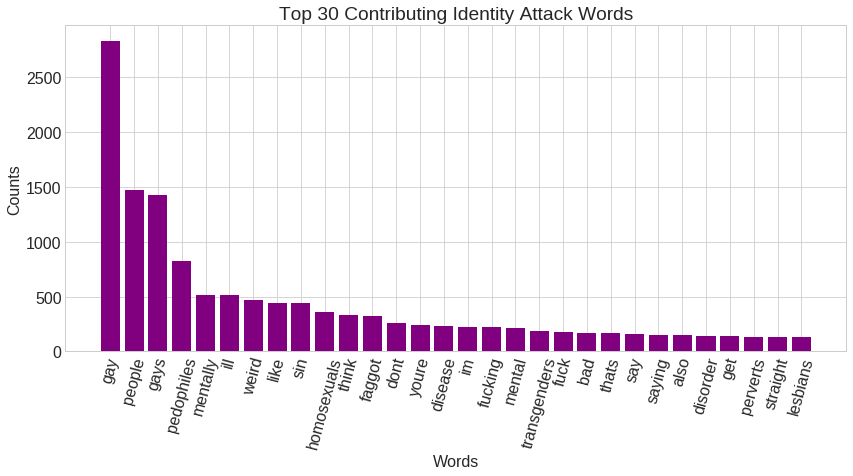

In [50]:
words, freq = [], []

for item in top30:
    words.append(item[0])
    freq.append(item[1])
    
    
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams.update({'font.size': 16})
plt.xticks(rotation = 75)
plt.bar(words, freq, color='purple')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 30 Contributing Identity Attack Words')
plt.show()